In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

import seaborn as sns

Preprocess the data by removing any nan values if any

In [4]:
MalwareDataset = pd.read_csv('malware.csv', sep='|')

(array([41323.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 96724.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

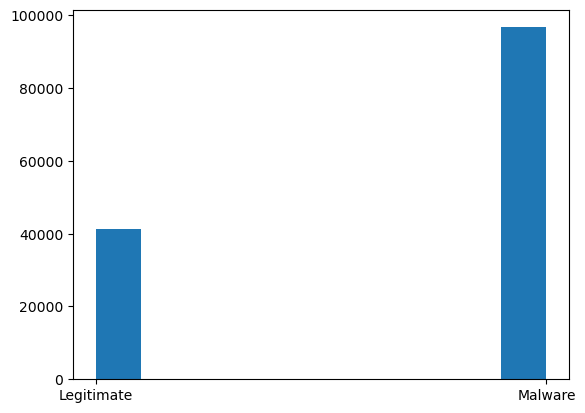

In [5]:
input = MalwareDataset['legitimate'].map({0:'Malware', 1:'Legitimate'})
plt.hist(input)

In [7]:
MalwareDataset.isnull().values.any()

False

This means our data is clean of any nulls, so we do not have to drop anything

In [8]:
MalwareDataset.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [9]:
MalwareDataset.tail()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0
138046,VirusShare_d7648eae45f09b3adb75127f43be6d11,d7648eae45f09b3adb75127f43be6d11,332,224,258,11,0,111616,468480,0,...,4,4.407252,1.980482,6.115374,96625.000000,20,318464,72,0,0


In [10]:
MalwareDataset = MalwareDataset.drop(['Name', 'md5'], axis=1)

In [11]:
MalwareDataset.nunique()

Machine                            3
SizeOfOptionalHeader               5
Characteristics                  104
MajorLinkerVersion                41
MinorLinkerVersion                62
SizeOfCode                      3809
SizeOfInitializedData           3217
SizeOfUninitializedData          441
AddressOfEntryPoint            23110
BaseOfCode                       385
BaseOfData                      1106
ImageBase                       9099
SectionAlignment                  12
FileAlignment                      9
MajorOperatingSystemVersion       12
MinorOperatingSystemVersion       12
MajorImageVersion                 38
MinorImageVersion                 70
MajorSubsystemVersion              6
MinorSubsystemVersion             10
SizeOfImage                     2312
SizeOfHeaders                     30
CheckSum                       81633
Subsystem                          4
DllCharacteristics                74
SizeOfStackReserve                40
SizeOfStackCommit                 40
S

In [16]:
import sklearn
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [20]:
target = 'legitimate'
features = MalwareDataset.columns.to_list()
features.remove(target)

display(features)

['Machine',
 'SizeOfOptionalHeader',
 'Characteristics',
 'MajorLinkerVersion',
 'MinorLinkerVersion',
 'SizeOfCode',
 'SizeOfInitializedData',
 'SizeOfUninitializedData',
 'AddressOfEntryPoint',
 'BaseOfCode',
 'BaseOfData',
 'ImageBase',
 'SectionAlignment',
 'FileAlignment',
 'MajorOperatingSystemVersion',
 'MinorOperatingSystemVersion',
 'MajorImageVersion',
 'MinorImageVersion',
 'MajorSubsystemVersion',
 'MinorSubsystemVersion',
 'SizeOfImage',
 'SizeOfHeaders',
 'CheckSum',
 'Subsystem',
 'DllCharacteristics',
 'SizeOfStackReserve',
 'SizeOfStackCommit',
 'SizeOfHeapReserve',
 'SizeOfHeapCommit',
 'LoaderFlags',
 'NumberOfRvaAndSizes',
 'SectionsNb',
 'SectionsMeanEntropy',
 'SectionsMinEntropy',
 'SectionsMaxEntropy',
 'SectionsMeanRawsize',
 'SectionsMinRawsize',
 'SectionMaxRawsize',
 'SectionsMeanVirtualsize',
 'SectionsMinVirtualsize',
 'SectionMaxVirtualsize',
 'ImportsNbDLL',
 'ImportsNb',
 'ImportsNbOrdinal',
 'ExportNb',
 'ResourcesNb',
 'ResourcesMeanEntropy',
 'Resour

In [21]:
X = MalwareDataset[features]
Y = MalwareDataset[target]

In [24]:
from sklearn.model_selection import train_test_split
Legit_Train, Legit_Test, Malware_Train, Malware_Test = train_test_split(X, Y, test_size=0.2)

In [25]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)

sfs = SequentialFeatureSelector(rf, n_features_to_select=4, n_jobs=-1)
sfs_X_train = sfs.fit_transform(Legit_Train, Malware_Train)

display(sfs.get_feature_names_out())

pd.DataFrame(sfs_X_train)

array(['Characteristics', 'SectionsMaxEntropy', 'ResourcesMaxEntropy',
       'VersionInformationSize'], dtype=object)

,0,1,2,3
0,33166.0,6.648695,5.244956,0.0
1,258.0,7.966134,3.764385,14.0
2,258.0,7.961871,7.992688,14.0
3,8462.0,3.581755,3.553298,16.0
4,258.0,5.899579,4.922740,16.0
...,...,...,...,...
110432,258.0,7.966134,3.764385,14.0
110433,33167.0,7.926939,7.920188,18.0
110434,258.0,7.965301,7.992688,14.0
110435,258.0,6.547855,6.504819,0.0


In [26]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=-1)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=-1)

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_jobs=-1)

ridge.fit(Legit_Train, Malware_Train)
logreg.fit(Legit_Train, Malware_Train)
knn.fit(Legit_Train, Malware_Train)
nb.fit(Legit_Train, Malware_Train)
forest.fit(Legit_Train, Malware_Train)


print(f"RIDGE Classifier score: {ridge.score(Legit_Test, Malware_Test)}")
print(f"LOGREG Classifier score: {logreg.score(Legit_Test, Malware_Test)}")
print(f"KNN Classifier score: {knn.score(Legit_Test, Malware_Test)}")
print(f"NB Classifier score: {nb.score(Legit_Test, Malware_Test)}")
print(f"FOREST Classifier score: {forest.score(Legit_Test, Malware_Test)}")

C:\Users\Infatal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.20312e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RIDGE Classifier score: 0.964070988772184
LOGREG Classifier score: 0.7030785947120608
KNN Classifier score: 0.9871785584932995
NB Classifier score: 0.7030785947120608
FOREST Classifier score: 0.9952553422672945


Based on this Random Forest seems to be the best, so I will use it.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
forest2 = RandomForestClassifier()

hyper_parameters = {
    'n_estimators':[50, 100, 200],
    'min_samples_split':[2, 3, 4],
    'min_samples_leaf':[1, 2, 3],
    'min_weight_fraction_leaf':[0.0, 0.3, 0.5],
    'min_impurity_decrease':[0.0, 1.0, 2.0]
}

gscv = GridSearchCV(forest2, hyper_parameters, n_jobs=-1)
gscv.fit(Legit_Train, Malware_Train)

best_params = gscv.best_params_
best_param_score = gscv.best_score_

print(f"Best params: {best_params}")
print(f"Best param scores: {best_param_score}")

Best params: {'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200}
Best param scores: 0.9946304190007422


From the results it seems like the default hyper parameters seem to be the best to use for this classifier except for the n_estimators (Takes a very very long time to run. Careful)

In [29]:
#train using best parameters
forest3 = RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1)
forest3.fit(X, Y)
y_test = forest3.predict(Legit_Test)

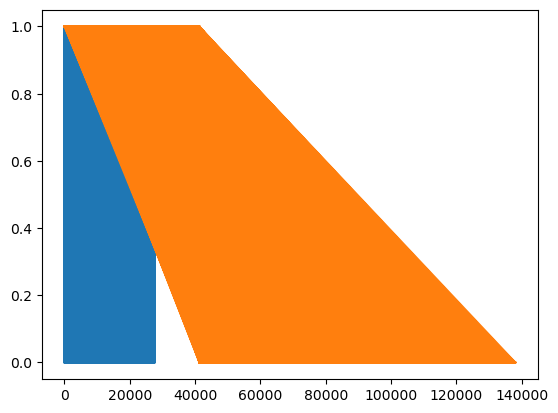

In [31]:
plt.plot(y_test)
plt.plot(Malware_Test)

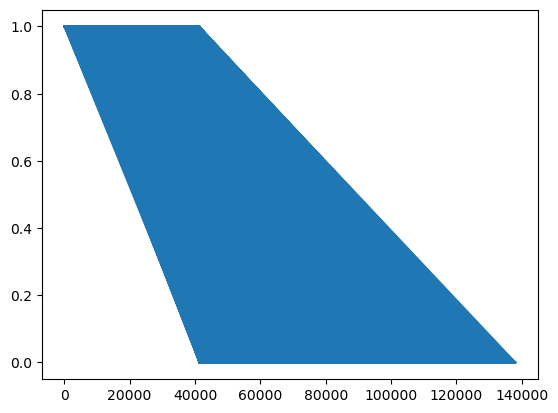

In [32]:
plt.plot(Malware_Test)

In [33]:
y_test_proba  = forest3.predict_proba(Legit_Test)

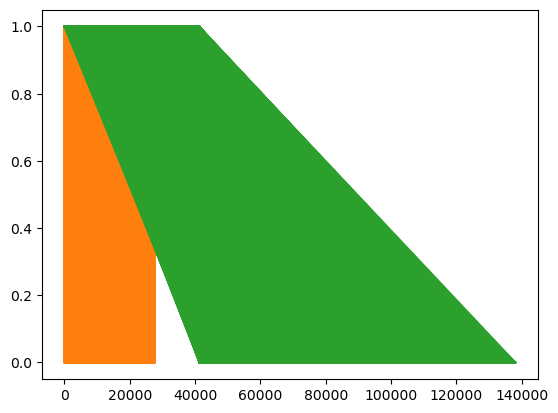

In [46]:
plt.plot(y_test_proba)
plt.plot(Malware_Test)

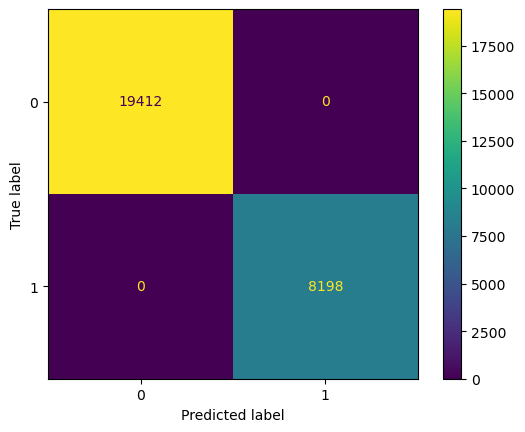

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
#tpr = recall_score(Legit_Test, y_test)

cm = confusion_matrix(Malware_Test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [60]:
tpr = recall_score(Malware_Test, y_test)
tnr = recall_score(Malware_Test, y_test, pos_label=0)

In [63]:
fpr = 1 - tnr
fnr = 1 - tpr

display(f"False Positive Rate: {fpr}")
display(f"False Negative Rate: {fnr}")

'False Positive Rate: 0.0'

'False Negative Rate: 0.0'

In [65]:
tn, fp, fn, tp = confusion_matrix(Malware_Test, y_test).ravel()

display(fp)
display(fn)
display(tn)
display(tp)

0

0

19412

8198

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

display(f1_score(Malware_Test, y_test, average='macro'))
display(f1_score(Malware_Test, y_test, average='micro'))
display(f1_score(Malware_Test, y_test, average='weighted'))
display(f1_score(Malware_Test, y_test, zero_division=1))

1.0

1.0

1.0

1.0

In [75]:
print(accuracy_score(Malware_Test, y_test))
print(accuracy_score(Malware_Test, y_test, normalize=False))

1.0
27610


In [78]:
from sklearn.metrics import precision_score

display(precision_score(Malware_Test, y_test, average='macro'))
display(precision_score(Malware_Test, y_test, average='micro'))
display(precision_score(Malware_Test, y_test, average='weighted'))
display(precision_score(Malware_Test, y_test, average=None))

1.0

1.0

1.0

array([1., 1.])

All the scores seem to be really good. 

In [ ]:
pd.plotting.scatter_matrix(MalwareDataset)

array([[<Axes: xlabel='Machine', ylabel='Machine'>,
        <Axes: xlabel='SizeOfOptionalHeader', ylabel='Machine'>,
        <Axes: xlabel='Characteristics', ylabel='Machine'>, ...,
        <Axes: xlabel='LoadConfigurationSize', ylabel='Machine'>,
        <Axes: xlabel='VersionInformationSize', ylabel='Machine'>,
        <Axes: xlabel='legitimate', ylabel='Machine'>],
       [<Axes: xlabel='Machine', ylabel='SizeOfOptionalHeader'>,
        <Axes: xlabel='SizeOfOptionalHeader', ylabel='SizeOfOptionalHeader'>,
        <Axes: xlabel='Characteristics', ylabel='SizeOfOptionalHeader'>,
        ...,
        <Axes: xlabel='LoadConfigurationSize', ylabel='SizeOfOptionalHeader'>,
        <Axes: xlabel='VersionInformationSize', ylabel='SizeOfOptionalHeader'>,
        <Axes: xlabel='legitimate', ylabel='SizeOfOptionalHeader'>],
       [<Axes: xlabel='Machine', ylabel='Characteristics'>,
        <Axes: xlabel='SizeOfOptionalHeader', ylabel='Characteristics'>,
        <Axes: xlabel='Characteristics'